<a href="https://colab.research.google.com/github/BennamatAbdelbassit/Text-Mining/blob/master/Language_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import re
from nltk.tokenize import sent_tokenize
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
data = pd.read_csv('/content/dataset.csv')
data

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [6]:
data['language'].value_counts()

Russian       1000
Dutch         1000
Romanian      1000
Arabic        1000
Urdu          1000
Turkish       1000
Latin         1000
Swedish       1000
Korean        1000
Tamil         1000
Spanish       1000
Thai          1000
Persian       1000
Indonesian    1000
Japanese      1000
French        1000
Portugese     1000
Estonian      1000
Chinese       1000
English       1000
Hindi         1000
Pushto        1000
Name: language, dtype: int64

In [0]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

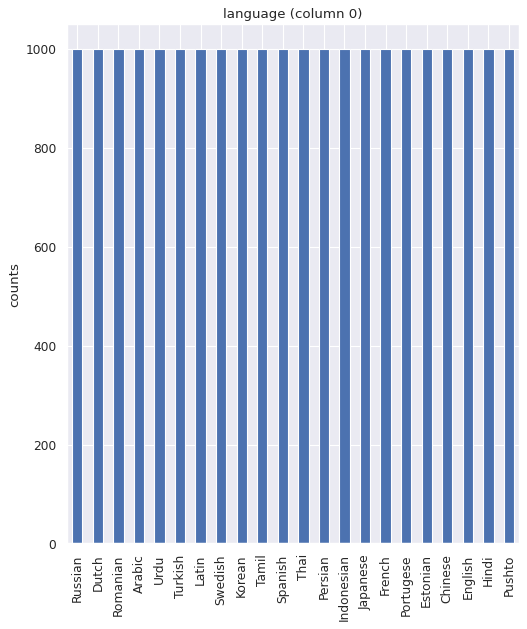

In [11]:
plotPerColumnDistribution(data, 10, 5)

In [0]:
text = data.Text
language = data.language
X_train, X_test, y_train, y_test = train_test_split(text, language, test_size=0.30, random_state=5)

In [33]:
X_test

1104     the phylogeography of this group provides exam...
21977    constantin petala n  aprilie  - d ? a fost unu...
1933     در حال حاضر هفت مجمع وابسته به مجامع معاهده حق...
10839    conceptul de integrare europeană integrarea ar...
7213     วันที่  มกราคม พศ  มีมติคณะรัฐมนตรี ครม ยกเว้น...
                               ...                        
18038    setelah kita memastikan bahwa ransum yang kita...
17214    стал известным благодаря роли в фильме «» съём...
17500    دپاکواوبواهميت  اوبه پاکې دي اوچټل شيان پاکوي ...
15802    صدر ارجنٹائنی قوم president of the argentine n...
7449     metropolitan mall bekasi memiliki lokasi yang ...
Name: Text, Length: 6600, dtype: object

In [25]:
X_train.shape

(15400,)

In [17]:
X_test.shape

(6600,)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(15400, 216311)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(15400, 216311)

In [24]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(15400, 216311)

In [0]:
lang_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()), ])

In [27]:
lang_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions = lang_clf.predict(X_test)

In [29]:
accuracy_score(y_test,predictions)

0.9404545454545454

In [30]:
scores = cross_val_score(lang_clf, text, language, cv=5)
print("Mean cross-validation accuracy: " + str(scores.mean()))

Mean cross-validation accuracy: 0.9434999999999999
